# Mobile Payment Analysis and Forecasting

In this project, we analyze and forecast mobile payment transaction volumes using historical data. We employ ARIMA (AutoRegressive Integrated Moving Average) modeling to predict future transaction volumes. This analysis will help understand trends, seasonal patterns, and provide insights into future mobile payment behaviors.


## Data Description

The dataset contains monthly mobile payment data from January 2013 to March 2024. The columns in the dataset include:
- **Month**: The month of the data entry.
- **Volumes**: The number of transactions.
- **Values (K)**: The monetary value of transactions in thousands.

We aim to use this data to forecast future transaction volumes.


In [1]:
import pandas as pd

# Load the Excel file
file_path = 'linear/MobileMoney.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Combine data from all sheets into a single DataFrame
all_data = pd.DataFrame()

for sheet, df in data.items():
    # Skip rows that are not needed
    df = df.iloc[2:]
    
    # Rename columns
    df.columns = ['Month', 'Volumes', 'Values (K)']
    
    # Add a year column based on the sheet name
    df['Year'] = sheet
    
    # Append to the combined DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_7840\1737388467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = sheet
C:\Users\USER\AppData\Local\Temp\ipykernel_7840\1737388467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = sheet
C:\Users\USER\AppData\Local\Temp\ipykernel_7840\1737388467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [2]:
# MobileMoney_excel = all_data.to_excel("MobileMoneydata.xlsx", index=False)
# MobileMoney_excel

In [3]:
all_data["Values (K)"].max()

451984602780.4901

In [4]:
all_data.sort_values

<bound method DataFrame.sort_values of                    Month    Volumes          Values (K)  Year
0    2024-01-01 00:00:00  310531442  42043438958.150002  2024
1    2024-02-01 00:00:00  182228447  31726704816.420017  2024
2    2024-03-01 00:00:00  213792426  35203470734.420006  2024
3    2024-04-01 00:00:00        NaN                 NaN  2024
4    2024-05-01 00:00:00        NaN                 NaN  2024
..                   ...        ...                 ...   ...
151  2013-09-01 00:00:00    2153043        89859709.795  2013
152  2013-10-01 00:00:00    2347159       92941123.1904  2013
153  2013-11-01 00:00:00    2493644     97150374.778537  2013
154  2013-12-01 00:00:00    2603792         102913340.6  2013
155                TOTAL   24412326    957288216.423938  2013

[156 rows x 4 columns]>

# Trends in Mobile Payment Volumes Over Time

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


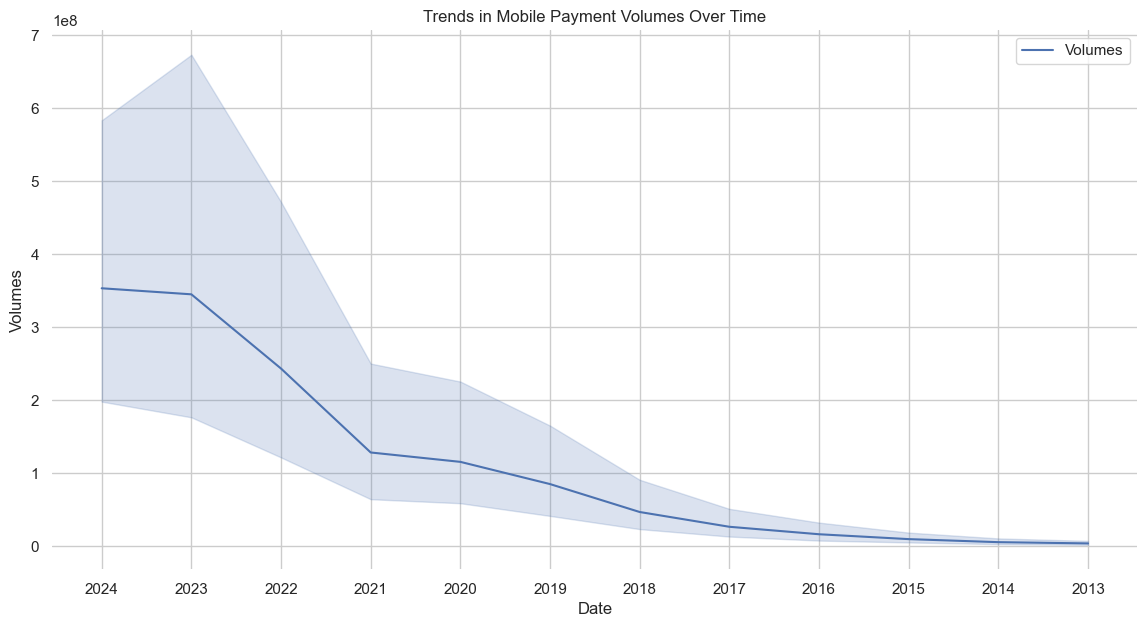

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the trends in transaction volumes over time
plt.figure(figsize=(14, 7))

sns.lineplot(data=all_data, x="Year", y='Volumes', label='Volumes', color='b')
plt.title('Trends in Mobile Payment Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volumes')
plt.legend()

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


In [6]:
# all_data_excel = all_data.to_excel("mobile_money_years_data.xlsx", index=False)
# all_data_excel

# Total sum of values 

In [7]:
all_data[["Values (K)"]].sum()

Values (K)    2438080525112.078613
dtype: object

# Max "Values (K)"

In [8]:
all_data[["Values (K)"]].max()

Values (K)    451984602780.490112
dtype: object

- filter totals for each year 

In [9]:
Totals = all_data.where(all_data["Month"] == "TOTAL").dropna()
Totals

,Month,Volumes,Values (K),Year
12,TOTAL,706552315,108973614508.990021,2024
25,TOTAL,2242443898,451984602780.490112,2023
38,TOTAL,1581355224,295828075728.23999,2022
51,TOTAL,834068499,169351442167.94928,2021
64,TOTAL,750514157,105815050439.757431,2020
77,TOTAL,552638552,49445749890.7808,2019
90,TOTAL,303955243,22191565753.858902,2018
103,TOTAL,172429910.89,7287745101.436399,2017
116,TOTAL,105934181.25,3561121959.251507,2016
129,TOTAL,62516655.7,2069611070.709363,2015


In [10]:
Totals["Values (K)"].max()

451984602780.4901

In [11]:
Totals["Values (K)"].min()

957288216.4239382

In [12]:
Totals["Values (K)"].sum()

1219040262556.04

# Trends in Mobile Payment Volumes Over Time

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


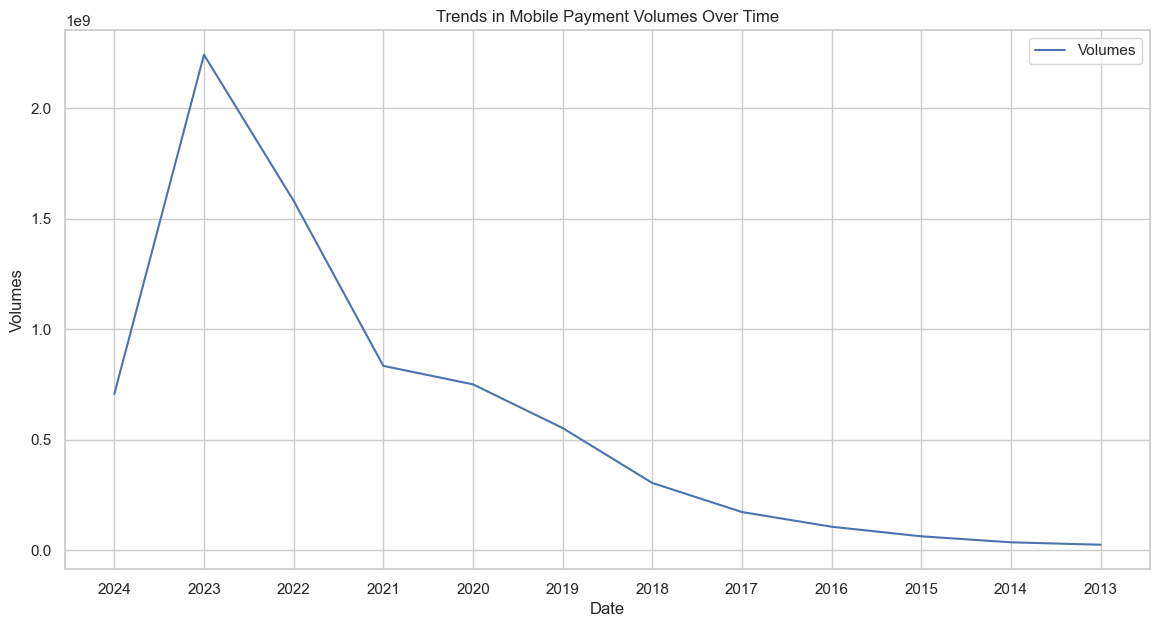

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the trends in transaction volumes over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=Totals, x="Year", y='Volumes', label='Volumes', color='b')
plt.title('Trends in Mobile Payment Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volumes')
plt.legend()
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


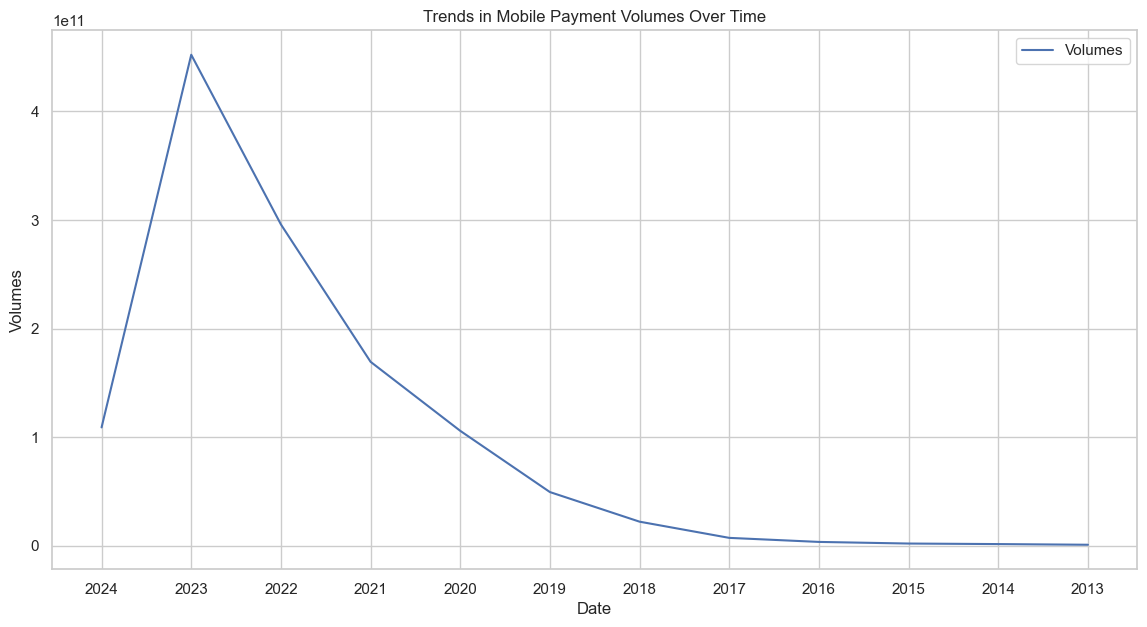

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the trends in transaction volumes over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=Totals, x="Year", y='Values (K)', label='Volumes', color='b')
plt.title('Trends in Mobile Payment Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volumes')
plt.legend()
plt.show()


# Distribution of Volume Data

C:\Users\USER\AppData\Local\Temp\ipykernel_7840\437403009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Totals["Volumes"])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

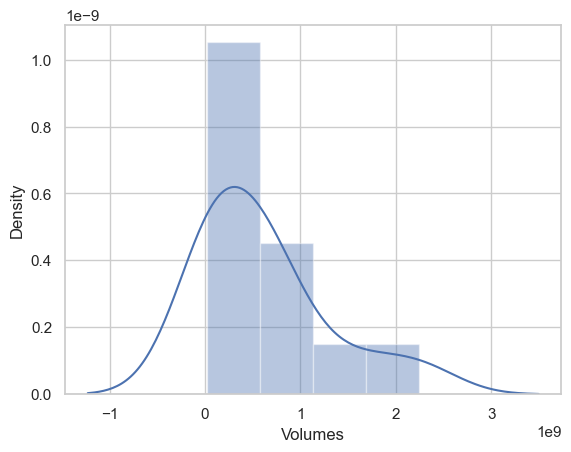

In [15]:
sns.distplot(Totals["Volumes"])

plt.show

# Distribution of "Values (K)" Data

C:\Users\USER\AppData\Local\Temp\ipykernel_7840\3782345218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Totals["Values (K)"])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

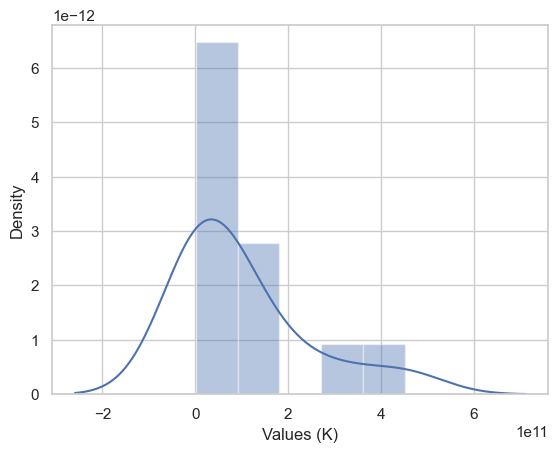

In [16]:
sns.distplot(Totals["Values (K)"])


plt.show

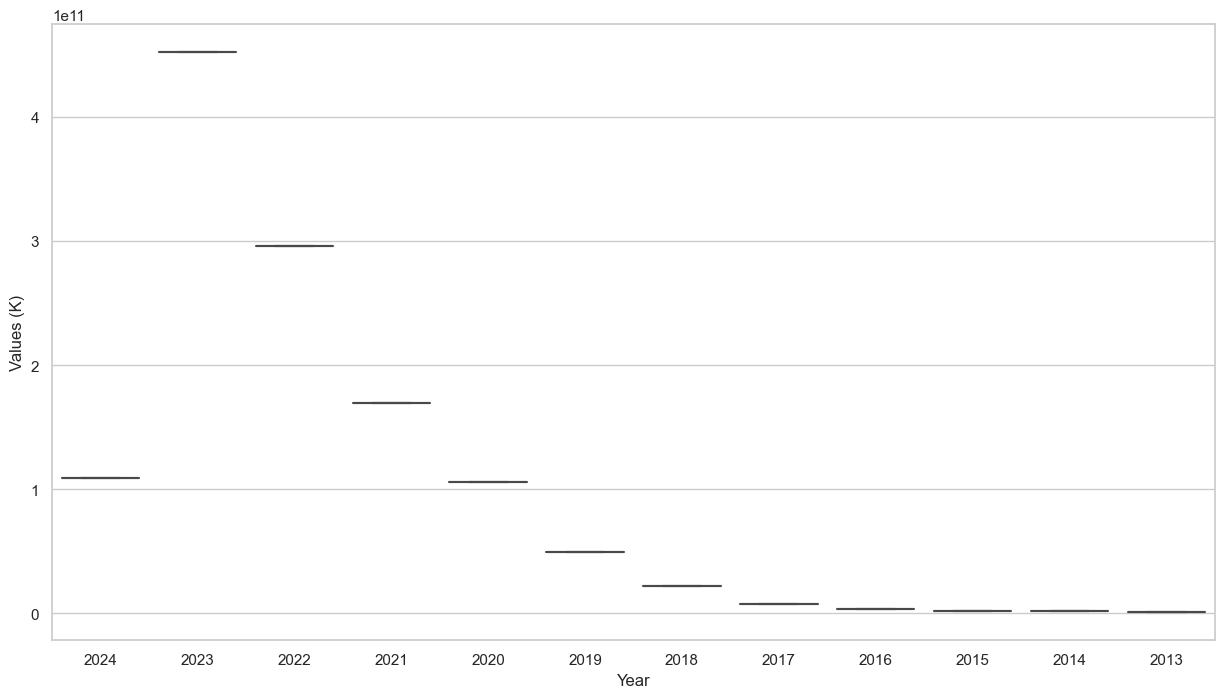

In [17]:
# plt.figure(figsize=(15, 8))

# sns.boxplot(x="Year", y="Values (K)", data= Totals, palette= "Spectral")

# plt.show()

# Yearly Trends in Values and Volumes 

<Figure size 1400x700 with 0 Axes>

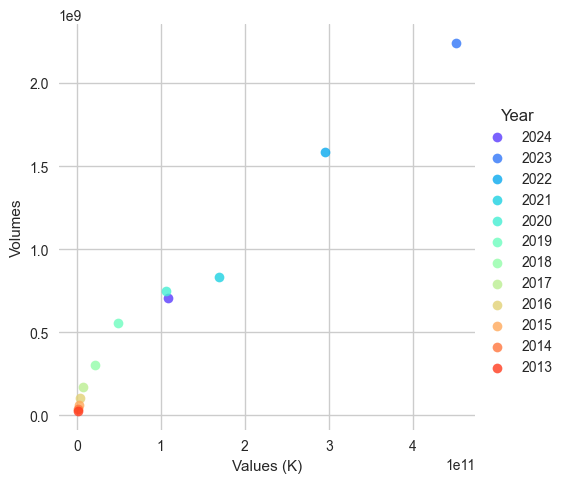

In [42]:
plt.figure(figsize=(14, 7))

sns.lmplot( x = "Values (K)", y = "Volumes", hue = "Year", data = Totals, palette = "rainbow")

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [20]:
Totals_mobile_money = Totals.to_excel("Totals_MobileMoney.xlsx", index=False)
Totals_mobile_money

In [21]:
# #set the figsize parameter 

# plt.figure(figsize=(15,9))
# sns.heatmap(Totals.corr(), annot=True, linewidths=0.5, cmap="Spectral") 
# plt.show()

Month         object
Volumes       object
Values (K)    object
Year          object
dtype: object
     Month       Volumes    Values (K)  Year
12     NaN  7.065523e+08  1.089736e+11  2024
25     NaN  2.242444e+09  4.519846e+11  2023
38     NaN  1.581355e+09  2.958281e+11  2022
51     NaN  8.340685e+08  1.693514e+11  2021
64     NaN  7.505142e+08  1.058151e+11  2020
77     NaN  5.526386e+08  4.944575e+10  2019
90     NaN  3.039552e+08  2.219157e+10  2018
103    NaN  1.724299e+08  7.287745e+09  2017
116    NaN  1.059342e+08  3.561122e+09  2016
129    NaN  6.251666e+07  2.069611e+09  2015
142    NaN  3.545795e+07  1.574395e+09  2014
155    NaN  2.441233e+07  9.572882e+08  2013


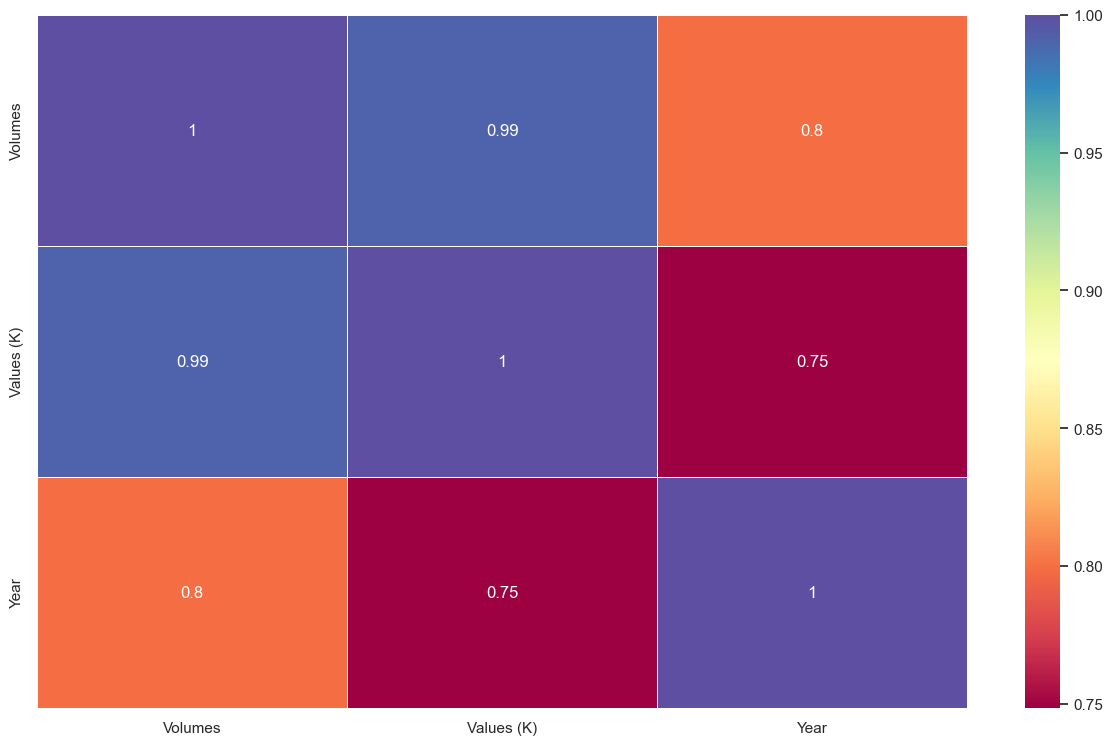

In [22]:

# Assuming Totals is your DataFrame

# Step 1: Identify non-numeric columns
print(Totals.dtypes)

# Step 2: Locate the problematic values
df_numeric = Totals.apply(pd.to_numeric, errors='coerce')
non_numeric_rows = df_numeric[df_numeric.isna().any(axis=1)]
print(non_numeric_rows)

# Step 3: Clean the data
# Option 1: Remove non-numeric rows
# df_cleaned = df_numeric.dropna()
df_cleaned = df_numeric.dropna(axis=1, how='any')


# Option 2: Remove non-numeric columns (uncomment if preferred)
# df_cleaned = Totals.select_dtypes(include=[np.number])

# Step 4: Recompute the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

In [23]:
df_cleaned

,Volumes,Values (K),Year
12,7.065523e+08,1.089736e+11,2024
25,2.242444e+09,4.519846e+11,2023
38,1.581355e+09,2.958281e+11,2022
51,8.340685e+08,1.693514e+11,2021
64,7.505142e+08,1.058151e+11,2020
77,5.526386e+08,4.944575e+10,2019
90,3.039552e+08,2.219157e+10,2018
103,1.724299e+08,7.287745e+09,2017
116,1.059342e+08,3.561122e+09,2016
129,6.251666e+07,2.069611e+09,2015


# REGRESSION ANALYSIS 

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X = df_cleaned.drop(["Values (K)"], axis=1)
y = df_cleaned["Values (K)"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# here we are spacifying the variable and giving the size we want to divide as a percentage
# this code will divide 20% by 80 percent
# set the random to 42 to see the same split, "like spliting the data training and test data"it is the most used 

In [27]:
# lets see how the split happened 
X_train

,Volumes,Year
116,1.059342e+08,2016
77,5.526386e+08,2019
38,1.581355e+09,2022
25,2.242444e+09,2023
155,2.441233e+07,2013
64,7.505142e+08,2020
103,1.724299e+08,2017
51,8.340685e+08,2021
90,3.039552e+08,2018


In [28]:
y_train

116    3.561122e+09
77     4.944575e+10
38     2.958281e+11
25     4.519846e+11
155    9.572882e+08
64     1.058151e+11
103    7.287745e+09
51     1.693514e+11
90     2.219157e+10
Name: Values (K), dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm_model = LinearRegression()

lm_model #?# here our linear regression object has been created 

LinearRegression()

In [31]:
# now and first we will train our data

lm_model.fit(X_train, y_train) # here we will put our traing data

# the model is now trained 

LinearRegression()

In [32]:
# so here we will look at the intercept value   

lm_model.intercept_

# this means that when X = 0 the y value is this below and is the STARTING POINT 

13661761679091.186

In [33]:
# now lets  look at the coefient of the other variables 

coef_param = pd.DataFrame(lm_model.coef_, index = X.columns, columns = ["Coeffient"])
coef_param

#  so here we are able to see the coeficient of the independent variables in this case and in the formula they represent "B1, B2..."
# NOTE THAT THIS DATA IS COEFIFIENT ANALYSIS IN RELATION TO "mpg" in Linear regresion 


,Coeffient
Volumes,2.350225e+02
Year,-6.791403e+09


In [34]:
# now like we check how accurate this model is 

y_pred = lm_model.predict(X_test)

In [35]:
my_dict = {"Actual": y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [36]:
compare.sample(2)

,Actual,Pred
129,2.069611e+09,-8.222615e+09
142,1.574395e+09,-7.790616e+09


In [37]:
# metrix methods 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [38]:
def evaluation_metrics(actual,pred): 
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    SCORE = r2_score(actual, pred)
    
    return print("r2_score", SCORE, "\n", "mae:", MAE, "\n", "mse:", MSE, '\n', "rmse:", RMSE)

In [39]:
evaluation_metrics(y_test, y_pred)

r2_score 0.8797742878967949 
 mae: 15537749148.574347 
 mse: 3.0675328023231326e+20 
 rmse: 17514373532.396564


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


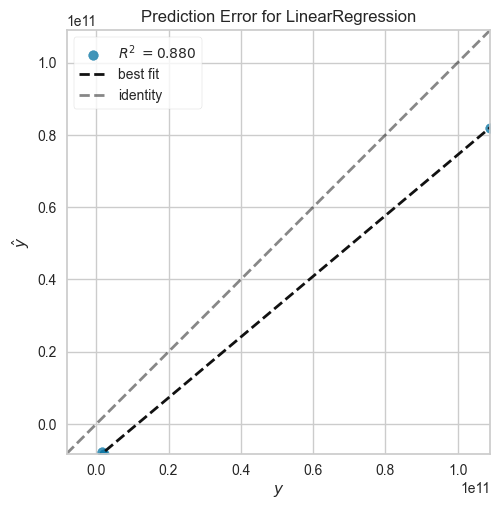

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)

# first train the visualizer object

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


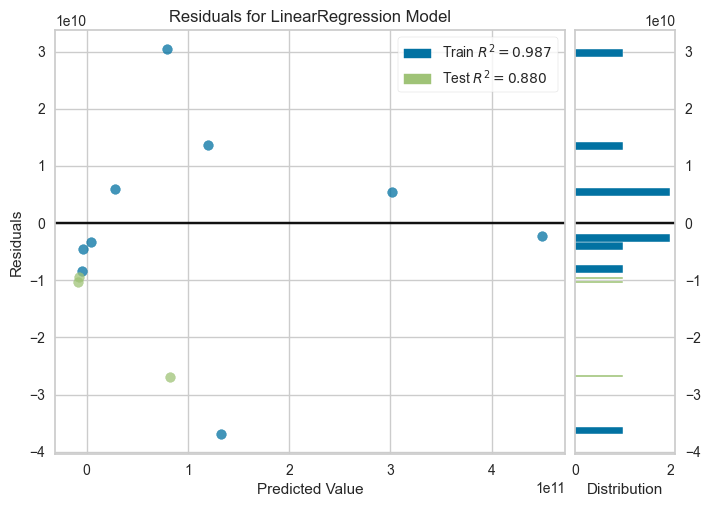

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

# first train the visualizer object

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()